In [1]:
import pandas as pd

See all themes

In [23]:
df = pd.read_csv('data/Brickset-Sets.csv')

# filter data
df = df.dropna(subset=['Pieces'])
df = df.dropna(subset=['RRP (USD)'])
df = df[df['Pieces'] > 10]

df

,Number,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (GBP),RRP (USD),RRP (CAD),...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Value new (USD),Value used (USD),Launch date,Exit date
0,31203-1,Art,Miscellaneous,2021,World Map,NaN,11695.0,214.99,249.99,349.99,...,NaN,NaN,NaN,NaN,NaN,NaN,279.96,224.68,01/06/2021,31/12/2023
1,10307-1,Icons,Landmarks,2022,Eiffel Tower,NaN,10001.0,554.99,629.99,799.99,...,NaN,NaN,NaN,NaN,NaN,NaN,582.13,452.29,25/11/2022,31/12/2025
2,10294-1,Icons,Miscellaneous,2021,Titanic,NaN,9090.0,589.99,679.99,849.99,...,NaN,NaN,NaN,NaN,NaN,NaN,657.55,509.77,08/11/2021,31/12/2026
3,10276-1,Icons,Landmarks,2020,Colosseum,NaN,9036.0,474.99,549.99,649.99,...,NaN,NaN,NaN,NaN,NaN,NaN,561.10,432.33,27/11/2020,31/12/2023
4,75192-1,Star Wars,Ultimate Collector Series,2017,Millennium Falcon,8.0,7541.0,734.99,849.99,1049.99,...,NaN,NaN,NaN,NaN,NaN,NaN,676.99,543.41,01/10/2017,31/12/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,4976-1,Duplo,LEGO Ville,2007,Cement Mixer,1.0,11.0,12.99,16.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,75.00,20.56,NaN,NaN
12941,4978-1,Duplo,LEGO Ville,2007,Road Sweeper,1.0,11.0,9.79,14.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.00,21.28,NaN,NaN
12943,5644-1,Duplo,Farm,2010,Chicken Coop,1.0,11.0,7.99,8.99,10.99,...,NaN,NaN,NaN,NaN,NaN,NaN,8.00,5.50,NaN,NaN
12944,5813-1,Duplo,Cars,2010,Lightning McQueen,1.0,11.0,13.49,14.99,19.99,...,NaN,NaN,NaN,NaN,NaN,NaN,24.07,7.68,NaN,NaN


# Data Analysis

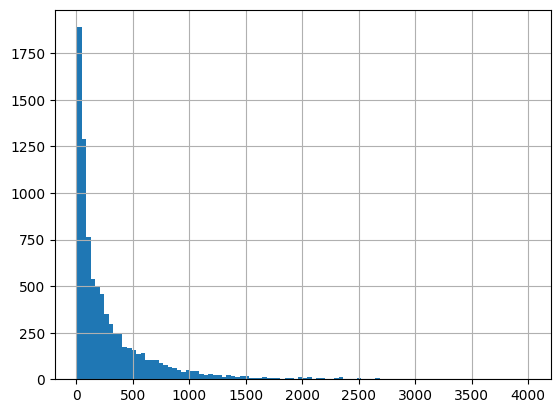

In [24]:
# pieces
hist = df['Pieces'].hist(bins=100, range=[10, 4000])

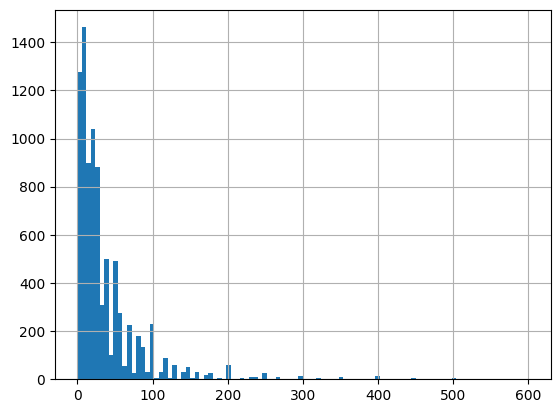

In [25]:
# price
hist = df['RRP (USD)'].hist(bins=100, range=[0, 600])

In [26]:
df.Theme.unique()

array(['Art', 'Icons', 'Star Wars', 'Ninjago', 'Harry Potter',
       'Creator Expert', 'Advanced models', 'Marvel Super Heroes',
       'Serious Play', 'The LEGO Ninjago Movie', 'Disney', 'Ghostbusters',
       'Miscellaneous', 'Technic', 'Bricklink', 'DC Comics Super Heroes',
       'Ideas', 'The LEGO Batman Movie', 'Samsonite', 'The LEGO Movie 2',
       'Jurassic World', 'Minecraft', 'Super Mario', 'Factory',
       'The LEGO Movie', 'The Simpsons', 'Monkie Kid', 'Basic',
       'The Lord of the Rings', 'Pirates of the Caribbean',
       'Stranger Things', 'Architecture', 'Friends', 'Monster Fighters',
       'City', 'Make and Create', 'Education', 'Seasonal', 'Classic',
       'Model Team', 'Castle', 'Indiana Jones', 'Creator', 'Racers',
       'Hidden Side', 'Exo-Force', 'Nexo Knights', 'Dreamzzz',
       'Promotional', 'Legends of Chima', 'Avatar', 'Ultra Agents',
       'Dots', 'Agents', 'DC Super Hero Girls', 'Batman', 'Vikings',
       'Elves', 'Space', 'Atlantis', 'Freestyle

Save to new data file

In [32]:
# remove bad themes
bad_themes = ['Serious Play']
df = df[~df['Theme'].isin(bad_themes)]

# filter by pieces
df = df[df['Pieces'] >= 100] 

# filer by columns having commas in strings
colsToCheck = ['Theme', 'Subtheme', 'Set name']
for col in colsToCheck:
    df = df[df[col].str.contains(',') == False]

# keep columns we need
df = df[['Number', 'Theme', 'Subtheme', 'Set name', 'Pieces', 'RRP (USD)', 'Year']]

# shuffle rows
df = df.sample(frac = 1)

df.to_csv('data/filtered_data.csv', index=False)
